# Algerian Forest Fires Dataset 

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# Importing necessary libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load dataset 

In [7]:
df=pd.read_csv('DataSets/5.EDA-Algerian_forest_fires_dataset.csv')

In [8]:
# Display the first few rows of the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# Handle Missing Values

### Check for missing values

In [12]:
# Check for missing values (Rows wise)
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add new column

The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [15]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [17]:
# typecast col
df[['Region']]=df[['Region']].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [19]:
# Check for missing values (Col wise)
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        2
Region         0
dtype: int64

### Delete Sub heading rows

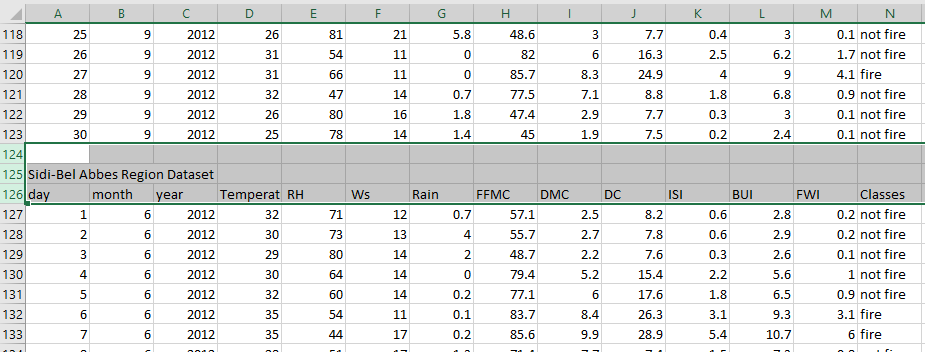

In [22]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [23]:
df.iloc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [24]:
df.iloc[[124]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [25]:
# remove the 122nd, 123rd & 124th row
df=df.drop(124).reset_index(drop=True)
df=df.drop(123).reset_index(drop=True)
df=df.drop(122).reset_index(drop=True)

In [26]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


### Handling missing values by filling with mean or median for numerical columns, and mode for categorical ones

In [28]:
df.fillna(df.mean(), inplace=True)  # Impute numerical columns with mean
df.fillna(df.mode().iloc[0], inplace=True)  # Impute categorical columns with mode

C:\Users\Admin\AppData\Local\Temp\ipykernel_16220\7962849.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Impute numerical columns with mean


In [29]:
df.mode()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,7,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire,0.0
1,10,8,NaN,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.mode().iloc[0]

day                  1
month                7
year              2012
Temperature         35
 RH                 55
 Ws                 14
Rain                 0
FFMC              88.9
DMC                7.9
DC                   8
ISI                1.1
BUI                  3
FWI                0.4
Classes        fire   
Region             0.0
Name: 0, dtype: object

In [31]:
# Check again after filling missing values
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [32]:
## fix spaces in columns names

print(f'Before :',df.columns)
df.columns=df.columns.str.strip()
print(f'After  :',df.columns)

Before : Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')
After  : Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [33]:
# Check data types of the columns
print(df.dtypes)

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object


In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
# Changes the required columns as integer data type

df[['day','month','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.1+ KB


In [37]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,7.500000,15.754098,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.038115,0.500000
std,1.112961,8.825059,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425364,0.501028
min,6.000000,1.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,7.000000,8.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,7.500000,16.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,0.500000
75%,8.000000,23.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,9.000000,31.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [38]:
## Save the cleaned dataset
df.to_csv('DataSets/5.EDA-Algerian_forest_fires_dataset-Cleaned.csv',index=False)

In [39]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [40]:
# List of numerical columns to scale
numerical_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [41]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,1,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,6,2,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,6,3,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,6,4,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,6,5,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [42]:
# Apply scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [43]:
# Check the first few rows after scaling
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,1,2012,-0.874735,-0.332478,0.889990,-0.381223,-0.851801,-0.913365,-0.877251,-0.833786,-0.935740,-0.882321,not fire,0
1,6,2,2012,-0.874735,-0.063185,-0.892913,0.270307,-0.942658,-0.856651,-0.877251,-0.905784,-0.900468,-0.895816,not fire,0
2,6,3,2012,-1.702005,1.350607,2.316313,6.184192,-2.151758,-0.986283,-0.887773,-1.073781,-0.985120,-0.936301,not fire,0
3,6,4,2012,-1.977761,1.821872,-0.892913,0.871719,-3.444727,-1.083506,-0.891981,-1.145779,-1.055663,-0.949796,not fire,0
4,6,5,2012,-1.426248,1.013990,0.176829,-0.381223,-0.914702,-0.945773,-0.738367,-0.857785,-0.900468,-0.882321,not fire,0


# Create New Features

You might also want to create new features based on existing ones. For instance, you could create a new feature fire_severity based on temperature and humidity, which could potentially be useful for prediction.

In [46]:
# Example of feature creation: Fire Severity (Temperature * Humidity)
df['Fire_severity'] = df['Temperature'] * df['RH']


In [47]:
# Check the new feature
df[['Temperature', 'RH', 'Fire_severity']].head()


,Temperature,RH,Fire_severity
0,-0.874735,-0.332478,0.290831
1,-0.874735,-0.063185,0.055270
2,-1.702005,1.350607,-2.298740
3,-1.977761,1.821872,-3.603226
4,-1.426248,1.013990,-1.446202


In [48]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Fire_severity
0,6,1,2012,-0.874735,-0.332478,0.889990,-0.381223,-0.851801,-0.913365,-0.877251,-0.833786,-0.935740,-0.882321,not fire,0,0.290831
1,6,2,2012,-0.874735,-0.063185,-0.892913,0.270307,-0.942658,-0.856651,-0.877251,-0.905784,-0.900468,-0.895816,not fire,0,0.055270
2,6,3,2012,-1.702005,1.350607,2.316313,6.184192,-2.151758,-0.986283,-0.887773,-1.073781,-0.985120,-0.936301,not fire,0,-2.298740
3,6,4,2012,-1.977761,1.821872,-0.892913,0.871719,-3.444727,-1.083506,-0.891981,-1.145779,-1.055663,-0.949796,not fire,0,-3.603226
4,6,5,2012,-1.426248,1.013990,0.176829,-0.381223,-0.914702,-0.945773,-0.738367,-0.857785,-0.900468,-0.882321,not fire,0,-1.446202


In [89]:
df['Classes']=df['Classes'].str.strip()

In [91]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [93]:
# Apply Label Encoding to 'Color' column
df['Classes'] = label_encoder.fit_transform(df['Classes'])

In [95]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Fire_severity
0,6,1,2012,-0.874735,-0.332478,0.889990,-0.381223,-0.851801,-0.913365,-0.877251,-0.833786,-0.935740,-0.882321,1,0,0.290831
1,6,2,2012,-0.874735,-0.063185,-0.892913,0.270307,-0.942658,-0.856651,-0.877251,-0.905784,-0.900468,-0.895816,1,0,0.055270
2,6,3,2012,-1.702005,1.350607,2.316313,6.184192,-2.151758,-0.986283,-0.887773,-1.073781,-0.985120,-0.936301,1,0,-2.298740
3,6,4,2012,-1.977761,1.821872,-0.892913,0.871719,-3.444727,-1.083506,-0.891981,-1.145779,-1.055663,-0.949796,1,0,-3.603226
4,6,5,2012,-1.426248,1.013990,0.176829,-0.381223,-0.914702,-0.945773,-0.738367,-0.857785,-0.900468,-0.882321,1,0,-1.446202


## ***Target Column = Classes***

In [97]:
df['Classes'].unique()

array([1, 0])

# Strip leading and trailing whitespaces from all columns
# df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [105]:
#df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Exploratory Data Analysis (EDA)

### Target variable is fire_occurrence, let's check the distribution of the target variable.

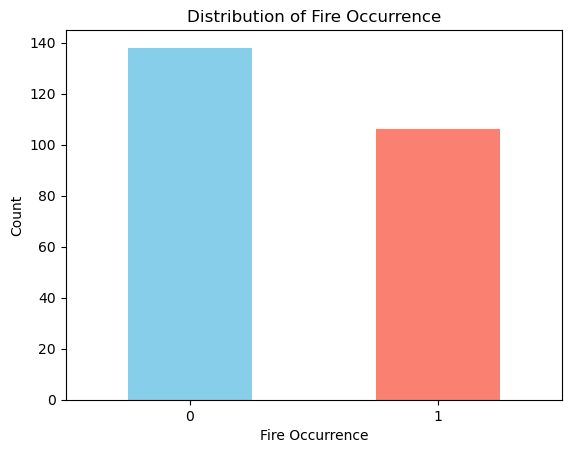

In [108]:
# Plot the distribution of target variable
df['Classes'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Correlation Heatmap

#### To understand the relationship between numerical features, we can compute the correlation matrix and plot a heatmap.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


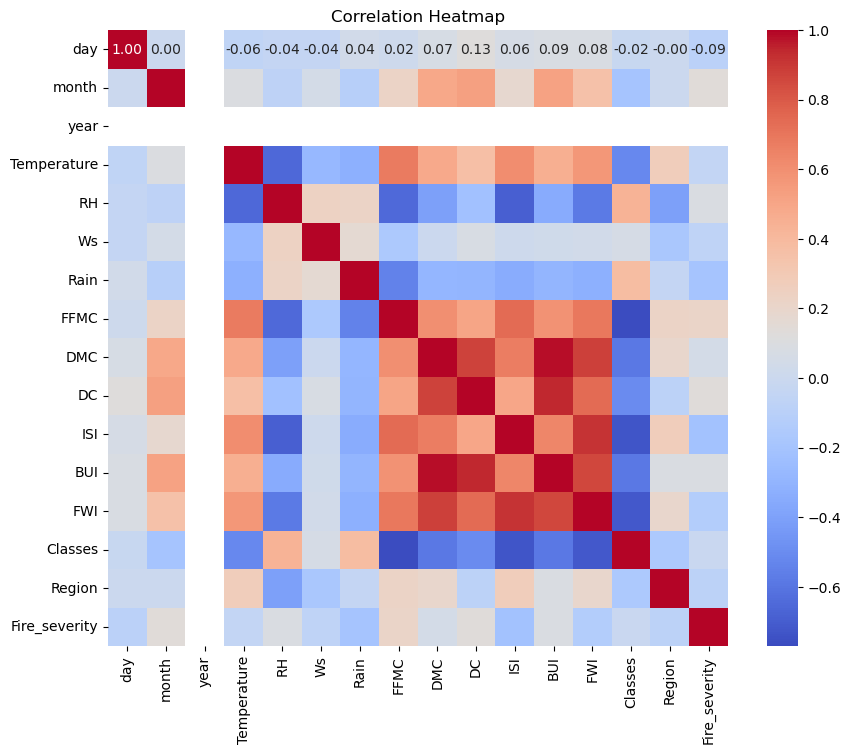

In [113]:
# Compute correlation matrix
corr = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Visualize Relationships Between Features


### Visualize relationships between some key features (e.g., temperature, humidity, wind_speed, and fire_occurrence).

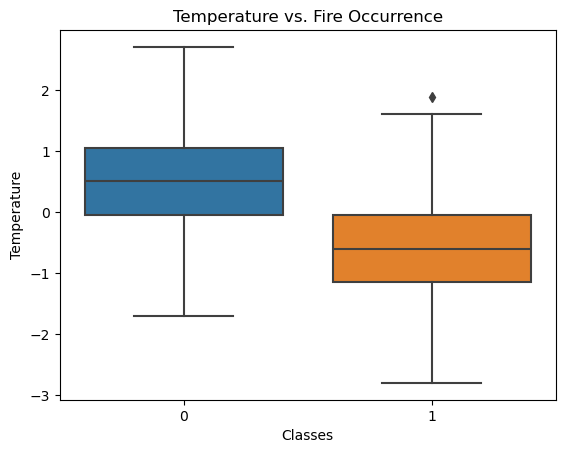

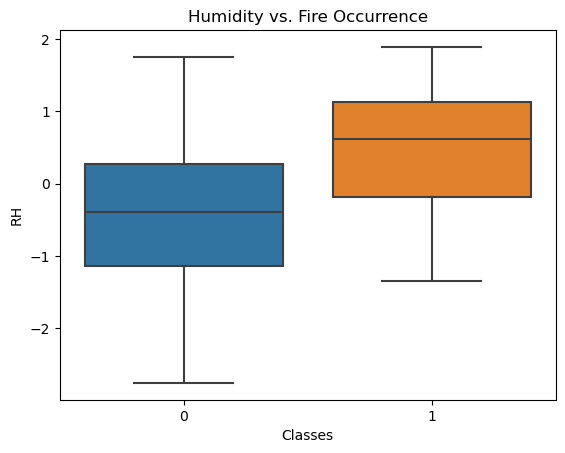

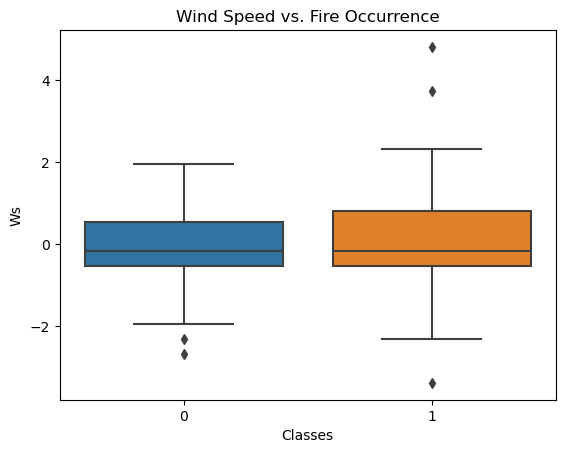

In [119]:
# Visualizing temperature vs. fire occurrence
sns.boxplot(x='Classes', y='Temperature', data=df)
plt.title('Temperature vs. Fire Occurrence')
plt.show()

# Visualizing humidity vs. fire occurrence
sns.boxplot(x='Classes', y='RH', data=df)
plt.title('Humidity vs. Fire Occurrence')
plt.show()

# Visualizing wind speed vs. fire occurrence
sns.boxplot(x='Classes', y='Ws', data=df)
plt.title('Wind Speed vs. Fire Occurrence')
plt.show()


# Pairplot 

### Visualize the relationship between multiple features

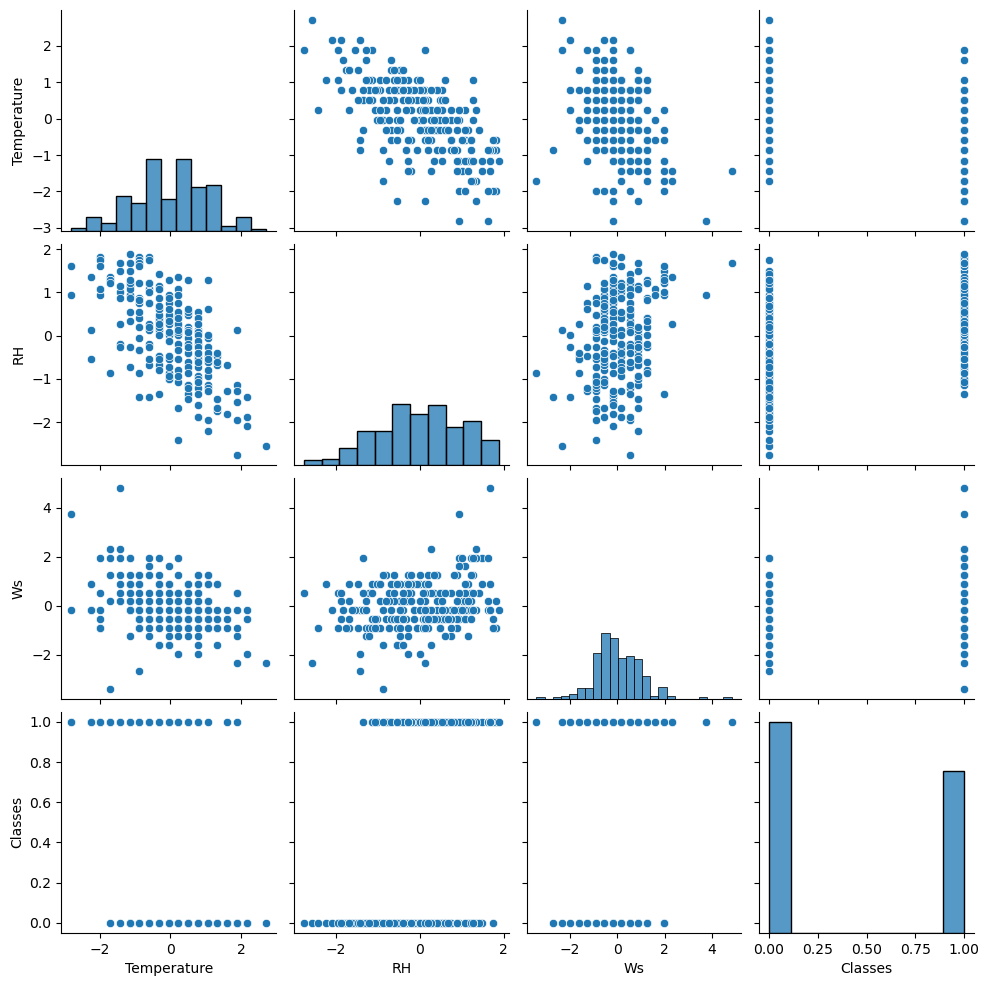

In [123]:
# Pairplot to visualize relationships between key features
sns.pairplot(df[['Temperature', 'RH', 'Ws', 'Classes']])
plt.show()

# Prepare Data for Machine Learning

### After feature engineering and EDA, you can now prepare the dataset for machine learning.

In [129]:
# Separate features and target

X = df.drop('Classes', axis=1)  # Features
y = df['Classes']               # Target


In [131]:
# Train-test split (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
print(f'X-Train : ',X_train.shape)
print(f'X-Test  : ',X_test.shape)
print(f'y-Train : ',y_train.shape)
print(f'y-Test  : ',y_test.shape)

X-Train :  (195, 15)
X-Test  :  (49, 15)
y-Train :  (195,)
y-Test  :  (49,)


In [141]:
"""
<END>
"""

'\n<END>\n'